In [13]:
from pycaret.regression import *
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import *
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import *
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor
from catboost.core import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct

from sklearn.metrics import mean_absolute_error, r2_score

### Load Functions

In [17]:
def load_dataset(dataset):
    if dataset == 'ixi':
        ixi_train = pd.read_csv('./new_IXI/ixi_train.csv', index_col = 0)
        ixi_test = pd.read_csv('./new_IXI/ixi_test.csv', index_col = 0)

        # AGE에서 소수점 아래를 버림 -> for stratified k fold
        ixi_train['age'] = ixi_train['age'].astype('int64')
        ixi_test['age'] = ixi_test['age'].astype('int64')

        # 모든 feature의 dtype : float64
        ixi_train = ixi_train.astype('float64')
        ixi_test = ixi_test.astype('float64')
        return ixi_train, ixi_test
    
    elif dataset == 'hcp':
        hcp_train = pd.read_csv('./new_HCP/hcp_train.csv', index_col=0)
        hcp_test = pd.read_csv('./new_HCP/hcp_test.csv', index_col=0)

        hcp_train = hcp_train.astype('float64')
        hcp_test = hcp_test.astype('float64')
        return hcp_train, hcp_test
    
    elif dataset =='cc':
        cc_train = pd.read_csv('./new_CAMCAN/cc_train.csv', index_col = 0)
        cc_test = pd.read_csv('./new_CAMCAN/cc_test.csv', index_col = 0)

        cc_train = cc_train.astype('float64')
        cc_test = cc_test.astype('float64')
        return cc_train, cc_test

In [4]:
def load_pipelines(dataset):
    
    # Load Model
    load_ada = load_model(f'./models/{dataset}/best_model/AdaBoostRegressor')# 1
    load_ard = load_model(f'./models/{dataset}/best_model/ARDRegression')# 2
    load_br = load_model(f'./models/{dataset}/best_model/BayesianRidge')# 3
    load_dt = load_model(f'./models/{dataset}/best_model/DecisionTreeRegressor')# 4
    load_en = load_model(f'./models/{dataset}/best_model/ElasticNet')# 5
    load_et = load_model(f'./models/{dataset}/best_model/ExtraTreesRegressor')# 6
    load_gbr = load_model(f'./models/{dataset}/best_model/GradientBoostingRegressor')# 7
    load_hr = load_model(f'./models/{dataset}/best_model/HuberRegressor')# 8
    load_kr = load_model(f'./models/{dataset}/best_model/KernelRidge')# 9
    load_knn = load_model(f'./models/{dataset}/best_model/KNeighborsRegressor')# 10
    load_lars = load_model(f'./models/{dataset}/best_model/Lars')# 11
    load_lasso = load_model(f'./models/{dataset}/best_model/Lasso')# 12
    load_llar = load_model(f'./models/{dataset}/best_model/LassoLars')# 13
    load_lgbm = load_model(f'./models/{dataset}/best_model/LGBMRegressor')# 14
    load_lr = load_model(f'./models/{dataset}/best_model/LinearRegression')# 15
    load_mlp = load_model(f'./models/{dataset}/best_model/MLPRegressor')# 16
    load_omp = load_model(f'./models/{dataset}/best_model/OrthogonalMatchingPursuit')# 17
    load_par = load_model(f'./models/{dataset}/best_model/PassiveAggressiveRegressor')# 18
    load_rf = load_model(f'./models/{dataset}/best_model/RandomForestRegressor')# 19
    load_ransac = load_model(f'./models/{dataset}/best_model/RANSACRegressor')# 10
    load_ridge = load_model(f'./models/{dataset}/best_model/Ridge')# 21
    load_svr = load_model(f'./models/{dataset}/best_model/SVR')# 22
    load_xgbr = load_model(f'./models/{dataset}/best_model/XGBRegressor')# 23
    load_tr = load_model(f'./models/{dataset}/best_model/TheilSenRegressor')# 24
    load_catboost = load_model(f'./models/{dataset}/best_model/Catboost')# 25
    load_gp = load_model(f'./models/{dataset}/best_model/GaussianProcessRegressor') # 26




    model_list = [load_ada, load_ard, load_br, load_dt, load_en, load_et, load_gbr, load_hr, load_kr, load_knn, load_lars, load_lasso, load_llar, load_lgbm,
             load_lr, load_mlp, load_omp, load_par, load_rf, load_ransac, load_ridge, load_svr, load_xgbr, load_tr, load_catboost, load_gp]
    model_name_list = ['Adaboost', 'ARD','Bayesian Ridge', 'Decision Tree', 'ElasticNet', 'ExtraTreesRegressor','GradientBoostingRegressor','HuberRegressor','KernelRidge','KNeighborRegressor','Lars','Lasso',
                  'LassoLars','LGBMRegressor','LinearRegression','MLPRegressor','OrthogonalMatchingPursuit','PassiveAggressiveRegressor','RandomForestRegressor','RANSAC','Ridge','SVR','XGBRegressor', 
                  'TheilsenRegressor', 'Catboost','GaussianProcess']
    
    return model_list, model_name_list

In [11]:
convert_name_dict = {'AdaBoost Regressor':'AdaBoostRegressor', 
                     'Automatic Relevance Determination':'ARDRegression', 
                     'Bayesian Ridge':'BayesianRidge', 
                     'Decision Tree Regressor':'DecisionTreeRegressor',
                     'Elastic Net':'ElasticNet',
                     'Extra Trees Regressor':'ExtraTreesRegressor', 
                     'Extreme Gradient Boosting':'XGBRegressor', 
                     'Gradient Boosting Regressor':'GradientBoostingRegressor',
                     'Huber Regressor':'HuberRegressor', 
                     'K Neighbors Regressor':'KNeighborsRegressor', 
                     'Kernel Ridge':'KernelRidge', 
                     'Lasso Least Angle Regression':'LassoLars',
                     'Lasso Regression':'Lasso', 
                     'Least Angle Regression':'Lars', 
                     'Light Gradient Boosting Machine':'LGBMRegressor', 
                     'Linear Regression':'LinearRegression', 
                     'MLP Regressor':'MLPRegressor', 
                     'Orthogonal Matching Pursuit':'OrthogonalMatchingPursuit',
                     'Passive Aggressive Regressor':'PassiveAggressiveRegressor',
                     'Random Forest Regressor':'RandomForestRegressor', 
                     'Random Sample Consensus':'RANSACRegressor', 
                     'Ridge Regression':'Ridge',
                     'Support Vector Regression':'SVR',
                     'CatBoost Regressor':'CatBoost Regressor',
                     'GaussianProcessRegressor':'GaussianProcessRegressor', 
                     'TheilSen Regressor':'TheilSen Regressor'}


def convert_model_name(pre_model):
    return convert_name_dict[pre_model]


# 현재 디렉토리 이동으로 인해서, 이것을 하려면 새로 디렉토리를 설정하거나, 코드를 수정해야 한다.
def choose_best_model(data_set):
    # Read Files
    manual_sg = pd.read_csv(f'./score_grid/{data_set}/{data_set}_26model_manual_train_score.csv', index_col=0)
    mae_sg = pd.read_csv(f'./score_grid/{data_set}/{data_set}_26model_pycaret_mae_train_score.csv', index_col=0)
    r2_sg = pd.read_csv(f'./score_grid/{data_set}/{data_set}_26model_pycaret_r2_train_score.csv', index_col=0)
    
    # set index
    mae_sg = mae_sg.reset_index(drop=False)
    r2_sg = r2_sg.reset_index(drop=False)
    
    # df.rename(columns = {'old_nm' : 'new_nm'}, inplace = True)
    mae_sg.rename(columns={'index':'Model'},inplace=True) 
    r2_sg.rename(columns={'index':'Model'},inplace=True) 
    
    # Convert Model Name 
    manual_sg['Model'] = manual_sg['Model'].apply(lambda x: convert_model_name(x))
    
    # Select Necessary Columns
    manual_sg = manual_sg[['Model','MAE','R2']]
    mae_sg = mae_sg[['Model','MAE','R2']]
    r2_sg = r2_sg[['Model','MAE','R2']]
    
    # Rename Columns
    manual_sg.columns = ['Model', 'manual_MAE', 'manual_R2']
    mae_sg.columns = ['Model', 'pycaret_mae_MAE', 'pycaret_mae_R2']
    r2_sg.columns = ['Model', 'pycaret_r2_MAE', 'pycaret_r2_R2']
    
    # Set "Model" Column as Index
    manual_sg = manual_sg.set_index('Model', drop=True)
    mae_sg = mae_sg.set_index('Model', drop=True)
    r2_sg = r2_sg.set_index('Model', drop=True)
    
    # 다른 DF에는 없는 Row를 삭제 
    manual_sg = manual_sg.drop(['CatBoost Regressor', 'TheilSen Regressor'])
    
    
    # Concatenation
    total_sg = pd.concat([manual_sg, mae_sg, r2_sg], axis=1)
    total_sg = total_sg.reset_index(drop=False)
    total_sg = total_sg.sort_values('Model')
    total_sg = total_sg[['Model','manual_MAE', 'pycaret_mae_MAE', 'pycaret_r2_MAE']].reset_index(drop=True)
    
    return total_sg

In [5]:
def load_trained_models(dataset):
    
    # Load Model
    load_ada = load_model(f'./models/{dataset}/best_model/AdaBoostRegressor')# 1
    load_ard = load_model(f'./models/{dataset}/best_model/ARDRegression')# 2
    load_br = load_model(f'./models/{dataset}/best_model/BayesianRidge')# 3
    load_dt = load_model(f'./models/{dataset}/best_model/DecisionTreeRegressor')# 4
    load_en = load_model(f'./models/{dataset}/best_model/ElasticNet')# 5
    load_et = load_model(f'./models/{dataset}/best_model/ExtraTreesRegressor')# 6
    load_gbr = load_model(f'./models/{dataset}/best_model/GradientBoostingRegressor')# 7
    load_hr = load_model(f'./models/{dataset}/best_model/HuberRegressor')# 8
    load_kr = load_model(f'./models/{dataset}/best_model/KernelRidge')# 9
    load_knn = load_model(f'./models/{dataset}/best_model/KNeighborsRegressor')# 10
    load_lars = load_model(f'./models/{dataset}/best_model/Lars')# 11
    load_lasso = load_model(f'./models/{dataset}/best_model/Lasso')# 12
    load_llar = load_model(f'./models/{dataset}/best_model/LassoLars')# 13
    load_lgbm = load_model(f'./models/{dataset}/best_model/LGBMRegressor')# 14
    load_lr = load_model(f'./models/{dataset}/best_model/LinearRegression')# 15
    load_mlp = load_model(f'./models/{dataset}/best_model/MLPRegressor')# 16
    load_omp = load_model(f'./models/{dataset}/best_model/OrthogonalMatchingPursuit')# 17
    load_par = load_model(f'./models/{dataset}/best_model/PassiveAggressiveRegressor')# 18
    load_rf = load_model(f'./models/{dataset}/best_model/RandomForestRegressor')# 19
    load_ransac = load_model(f'./models/{dataset}/best_model/RANSACRegressor')# 10
    load_ridge = load_model(f'./models/{dataset}/best_model/Ridge')# 21
    load_svr = load_model(f'./models/{dataset}/best_model/SVR')# 22
    load_xgbr = load_model(f'./models/{dataset}/best_model/XGBRegressor')# 23
    load_tr = load_model(f'./models/{dataset}/best_model/TheilSenRegressor')# 24
    load_catboost = load_model(f'./models/{dataset}/best_model/Catboost')# 25
    load_gp = load_model(f'./models/{dataset}/best_model/GaussianProcessRegressor') # 26




    model_list = [load_ada['trained_model'], load_ard['trained_model'], load_br['trained_model'], load_dt['trained_model'], load_en['trained_model'], load_et['trained_model'], load_gbr['trained_model'],
                  load_hr['trained_model'], load_kr['trained_model'], load_knn['trained_model'], load_lars['trained_model'], load_lasso['trained_model'], load_llar['trained_model'], load_lgbm['trained_model'],
                  load_lr['trained_model'], load_mlp['trained_model'], load_omp['trained_model'], load_par['trained_model'], load_rf['trained_model'], load_ransac['trained_model'], load_ridge['trained_model'], 
                  load_svr['trained_model'], load_xgbr['trained_model'], load_tr['trained_model'], load_catboost['trained_model'], load_gp['trained_model']]
    model_name_list = ['Adaboost', 'ARD','Bayesian Ridge', 'Decision Tree', 'ElasticNet', 'ExtraTreesRegressor','GradientBoostingRegressor','HuberRegressor','KernelRidge','KNeighborRegressor','Lars','Lasso',
                  'LassoLars','LGBMRegressor','LinearRegression','MLPRegressor','OrthogonalMatchingPursuit','PassiveAggressiveRegressor','RandomForestRegressor','RANSAC','Ridge','SVR','XGBRegressor', 
                  'TheilsenRegressor', 'Catboost','GaussianProcess']
    
    return model_list, model_name_list

In [38]:
# 기존에 ixi_test_score_df에서 test_df를 수정함으로써 전체 모델에 대해서 적용될 수 있도록 하였다. 
# 이후에, Test Score Grid에도 추가적인 Metric을 넣어주어야 할 때에는 같은 방식으로 코드를 수정하면 된다. 
def test_score_df(pipe_list, model_name_list, test_df):
    score_dict = {}
    mae_list= []
    r2_list = []
    
    for pipeline in pipe_list:
        pred = pipeline.predict(test_df.drop('age', axis=1))
        mae_list.append(mean_absolute_error(test_df['age'], pred))
        r2_list.append(r2_score(test_df['age'], pred))
        
    score_dict['Model'] = model_name_list
    score_dict['MAE'] = mae_list
    score_dict['R2'] = r2_list
    
    score_df = pd.DataFrame(score_dict)
    score_df = score_df.sort_values('MAE').reset_index(drop=True)
    
    return score_df

In [6]:
def cross_check(train_dataset, test_dataset):
    _, test_data = load_dataset(test_dataset)
    
    # Load Model
    load_ada = load_model(f'./models/{train_dataset}/best_model/AdaBoostRegressor')# 1
    load_ard = load_model(f'./models/{train_dataset}/best_model/ARDRegression')# 2
    load_br = load_model(f'./models/{train_dataset}/best_model/BayesianRidge')# 3
    load_dt = load_model(f'./models/{train_dataset}/best_model/DecisionTreeRegressor')# 4
    load_en = load_model(f'./models/{train_dataset}/best_model/ElasticNet')# 5
    load_et = load_model(f'./models/{train_dataset}/best_model/ExtraTreesRegressor')# 6
    load_gbr = load_model(f'./models/{train_dataset}/best_model/GradientBoostingRegressor')# 7
    load_hr = load_model(f'./models/{train_dataset}/best_model/HuberRegressor')# 8
    load_kr = load_model(f'./models/{train_dataset}/best_model/KernelRidge')# 9
    load_knn = load_model(f'./models/{train_dataset}/best_model/KNeighborsRegressor')# 10
    load_lars = load_model(f'./models/{train_dataset}/best_model/Lars')# 11
    load_lasso = load_model(f'./models/{train_dataset}/best_model/Lasso')# 12
    load_llar = load_model(f'./models/{train_dataset}/best_model/LassoLars')# 13
    load_lgbm = load_model(f'./models/{train_dataset}/best_model/LGBMRegressor')# 14
    load_lr = load_model(f'./models/{train_dataset}/best_model/LinearRegression')# 15
    load_mlp = load_model(f'./models/{train_dataset}/best_model/MLPRegressor')# 16
    load_omp = load_model(f'./models/{train_dataset}/best_model/OrthogonalMatchingPursuit')# 17
    load_par = load_model(f'./models/{train_dataset}/best_model/PassiveAggressiveRegressor')# 18
    load_rf = load_model(f'./models/{train_dataset}/best_model/RandomForestRegressor')# 19
    load_ransac = load_model(f'./models/{train_dataset}/best_model/RANSACRegressor')# 10
    load_ridge = load_model(f'./models/{train_dataset}/best_model/Ridge')# 21
    load_svr = load_model(f'./models/{train_dataset}/best_model/SVR')# 22
    load_xgbr = load_model(f'./models/{train_dataset}/best_model/XGBRegressor')# 23
    load_tr = load_model(f'./models/{train_dataset}/best_model/TheilSenRegressor')# 24
    load_catboost = load_model(f'./models/{train_dataset}/best_model/Catboost')# 25
    load_gp = load_model(f'./models/{train_dataset}/best_model/GaussianProcessRegressor') # 26


    model_list = [load_ada, load_ard, load_br, load_dt, load_en, load_et, load_gbr, load_hr, load_kr, load_knn, load_lars, load_lasso, load_llar, load_lgbm,
             load_lr, load_mlp, load_omp, load_par, load_rf, load_ransac, load_ridge, load_svr, load_xgbr, load_tr, load_catboost, load_gp]
    model_name_list = ['Adaboost', 'ARD','Bayesian Ridge', 'Decision Tree', 'ElasticNet', 'ExtraTreesRegressor','GradientBoostingRegressor','HuberRegressor','KernelRidge','KNeighborRegressor','Lars','Lasso',
                  'LassoLars','LGBMRegressor','LinearRegression','MLPRegressor','OrthogonalMatchingPursuit','PassiveAggressiveRegressor','RandomForestRegressor','RANSAC','Ridge','SVR','XGBRegressor', 
                  'TheilsenRegressor', 'Catboost','GaussianProcess']
    
    mae_list = []
    r2_list = []
    
    for model, name in zip(model_list, model_name_list):
        pred = model.predict(test_data.drop('age', axis=1))
        
        mae = mean_absolute_error(test_data['age'], pred)
        mae_list.append(mae)
        
        r2 = r2_score(test_data['age'], pred)
        r2_list.append(r2)
        
    
    score_dict = {'Model':model_name_list, 'MAE':mae_list,'R2':r2_list}
    score_grid = pd.DataFrame(score_dict)
    score_grid = score_grid.sort_values('MAE')
    
    return score_grid


# train_ixi_test_hcp = cross_check(train_dataset='ixi', test_dataset='hcp')
# train_ixi_test_hcp.to_csv('./cross_check/train_ixi_test_hcp.csv')

In [43]:
def save_predicted_age(dataset):
    train, test = load_dataset(dataset)
    pipe_list, model_name_list = load_pipelines(dataset)
    
    predicted_dict = {}
    
    for pipeline, model_name in zip(pipe_list, model_name_list):
        predicted_brain_age = pipeline.predict(test.drop('age', axis=1))
        predicted_dict[model_name] = predicted_brain_age
    
    predicted_df = pd.DataFrame(predicted_dict)
    
    return predicted_df

In [50]:
def save_feature_importance(dataset):
    # MLP와 KNN은 제외 
    print(f"{dataset.upper()} Start!")
    
    train, test = load_dataset(dataset)
    model_list, model_name_list = load_pipelines(dataset)
    
    linear_list = [1,2,4,7,10,11,12,14,16,17,20,21,23] # 13개
    tree_list = [0,3,5,6,13,18,22,24] # 8개
    
    feat_imp_dict = {}
    
    # Save Linear Model Coefficient 
    for i in linear_list:
        model = model_list[i]['trained_model']
        feat_importance = model.coef_
        feat_imp_dict[model_name_list[i]] = feat_importance.flatten()
    
    # Save Tree Model feature importance 
    for i in tree_list:
        model = model_list[i]['trained_model']
        feat_importance = model.feature_importances_
        feat_imp_dict[model_name_list[i]] = feat_importance.flatten()
        
        
        
    # RANSAC ,Gaussian Process, Kernel Ridge는 일반적인 Linear, Tree Model 방식으로는 적용  X 
    # RANSAC  # 22
    load_ransac = model_list[19]['trained_model']
    feat_importance = load_ransac.estimator_.coef_
    feat_imp_dict['RANSAC'] = feat_importance.flatten()
    
    # Gaussian Process  # 23 
    gp_model = model_list[25]['trained_model']
    gp_linear_reg = LinearRegression()
    gp_x = gp_model.X_train_
    gp_y = gp_model.y_train_
    gp_linear_reg.fit(gp_x, gp_y)
    feat_importance = gp_linear_reg.coef_
    feat_imp_dict['GaussianProcess'] = feat_importance.flatten()
    
    # Kernel Ridge  # 24
    load_kr = model_list[8]['trained_model']
    kr_x = train.drop('age', axis=1)
    kr_y = train['age']
    
    scaler = StandardScaler()
    scaler.fit(kr_x)
    zscore_x = scaler.transform(kr_x)
    
    ridge_model = Ridge() 
    ridge_model.fit(zscore_x, kr_y)
    
    feat_importance= ridge_model.coef_
    feat_imp_dict['KernelRidge'] = feat_importance.flatten()

    
    # Convert To DataFrame 
    feat_imp_df = pd.DataFrame(feat_imp_dict)
    
    return feat_imp_df


# ixi_feat_imp = save_feature_importance('ixi')
# hcp_feat_imp = save_feature_importance('hcp')
# cc_feat_imp = save_feature_importance('cc')

## Tuning Process

### IXI Tuning

**Manual Tuning**

In [ ]:
ixi_kr = KernelRidge(kernel="polynomial")
ixi_lar = Lars(n_nonzero_coefs=53, normalize=False)
ixi_llar = LassoLars(alpha=0.2, normalize=False)
ixi_ransac = RANSACRegressor(base_estimator=LinearRegression(), min_samples=30)
ixi_mlp = MLPRegressor(activation ='logistic', solver='lbfgs')
ixi_dt = DecisionTreeRegressor(criterion='mae', ccp_alpha=0.2)
ixi_lr = LinearRegression()
ixi_lasso = Lasso(alpha=0.2)
ixi_ridge = Ridge(alpha=125)
ixi_en = ElasticNet(alpha=0.3, l1_ratio=0.6)
ixi_br = BayesianRidge()
ixi_ard = ARDRegression(lambda_1=1.7, lambda_2=1.7)
ixi_par = PassiveAggressiveRegressor(C=0.0001, loss='squared_epsilon_insensitive')
ixi_omp = OrthogonalMatchingPursuit(n_nonzero_coefs=10)
ixi_svm = SVR(kernel='linear', C=0.1)
ixi_tr = TheilSenRegressor(n_jobs=-1)
ixi_rf = RandomForestRegressor(criterion='mae', max_depth=13, n_jobs=-1)
ixi_knn = KNeighborsRegressor(n_neighbors=10, weights='distance', n_jobs=-1, p=2)
ixi_huber = HuberRegressor(alpha=17, epsilon=2.5)
ixi_ada = AdaBoostRegressor(learning_rate=0.5, loss='square', n_estimators=100, random_state=1)
ixi_et = ExtraTreesRegressor(n_jobs=-1)
ixi_gbm = GradientBoostingRegressor(loss='lad', min_samples_split=8, random_state=1)
ixi_xgboost = XGBRegressor(max_depth=5, learning_rate=0.1, subsample=0.7, colsample_bytree=0.7)
ixi_lightgbr=LGBMRegressor(max_depth=8, learning_rate=0.1)
ixi_catboost = CatBoostRegressor()

In [ ]:
ixi_setting = setup(session_id = 1, data = ixi_train, target = 'AGE', test_data = ixi_test, normalize = True, normalize_method = 'zscore',transformation=True, fold_strategy='stratifiedkfold', use_gpu = True)

In [ ]:
manual_tuning_models = [ixi_lr, ixi_lasso, ixi_ridge, ixi_en, ixi_lar, ixi_llar, ixi_omp, ixi_br, ixi_ard, ixi_par, ixi_ransac,ixi_tr,ixi_huber, ixi_kr,ixi_svm,ixi_knn,ixi_dt,ixi_rf,ixi_et,ixi_ada,ixi_gbm,ixi_mlp,ixi_xgboost,ixi_lightgbr, ixi_catboost]

for manual_model in manual_tuning_models:
    train_model = create_model(manual_model)
    if str(manual_model).startswith('<catboost'):
        save_model(train_model, f"./tuned_models/ixi/manual_tuning/manual_catboost")
    else:
        save_model(train_model, f"./tuned_models/ixi/manual_tuning/manual_{str(train_model).split('(')[0]}")
        

**Pycaret MAE Optimize Tuning**

In [ ]:
# Theil-Sen, Gaussian Process, CatBoost는 Tuning 과정이 너무 오래 걸리고, 성능또한 좋아지지 않으므로, 제외 

ixi_models = [ixi_lr, ixi_lasso, ixi_ridge, ixi_en, ixi_lar, ixi_llar,
                        ixi_omp, ixi_br, ixi_ard, ixi_par, ixi_ransac, 
                        ixi_huber, ixi_kr, ixi_svm, ixi_knn, ixi_dt, ixi_rf, 
                        ixi_et, ixi_ada, ixi_gbm, ixi_mlp, ixi_xgboost, ixi_lightgbr]

for mae_tuning_model in ixi_models:
    mae_tune_model = tune_model(mae_tuning_model, optimize='MAE')
    save_model(mae_tune_model, f"./tuned_models/ixi/pycaret_mae/mae_{str(mae_tune_model).split('(')[0]}")

**Pycaret R2 Optimize Tuning**

In [ ]:
for r2_tuning_model in ixi_models:
    r2_tune_model = tune_model(r2_tuning_model, optimize='R2')
    save_model(r2_tune_model, f"./tuned_models/ixi/pycaret_r2/r2_{str(r2_tune_model).split('(')[0]}")

### HCP Tuning

**Manual Tuning**

In [ ]:
hcp_kr = KernelRidge(kernel="polynomial")
hcp_lar = Lars(n_nonzero_coefs=95, normalize=False)
hcp_llar = LassoLars(alpha=0.05, normalize=False)
hcp_ransac = RANSACRegressor(base_estimator=LinearRegression(), min_samples=18) 
hcp_mlp = MLPRegressor(activation='logistic', solver='lbfgs')
hcp_dt = DecisionTreeRegressor(criterion='mae', ccp_alpha=0.1)
hcp_lr = LinearRegression()
hcp_lasso = Lasso(alpha=0.05)
hcp_ridge = Ridge(alpha=110)
hcp_en = ElasticNet(alpha=0.25, l1_ratio=0.001)
hcp_br = BayesianRidge()
hcp_ard = ARDRegression(lambda_1=5e-03, lambda_2=5e-03)
hcp_par = PassiveAggressiveRegressor(C=0.0001, loss = 'squared_epsilon_insensitive')
hcp_omp = OrthogonalMatchingPursuit(n_nonzero_coefs=9)
hcp_svm = SVR(kernel='rbf', C=9)
hcp_tr = TheilSenRegressor(n_jobs=-1)
hcp_rf = RandomForestRegressor(n_jobs=-1)
hcp_knn = KNeighborsRegressor(n_neighbors=15, weights='distance', n_jobs=-1, p=2)
hcp_huber = HuberRegressor(alpha=40, epsilon=2)
hcp_ada = AdaBoostRegressor(learning_rate=0.5, loss='square', n_estimators=100, random_state=1)
hcp_et = ExtraTreesRegressor(n_jobs=-1)
hcp_gbm = GradientBoostingRegressor()
hcp_xgboost = XGBRegressor(max_depth=5, learning_rate=0.05, subsample=0.7, colsample_bytree=0.7)
hcp_lightgbr= LGBMRegressor(max_depth=8, learning_rate=0.03)
hcp_catboost = CatBoostRegressor()
hcp_gp = GaussianProcessRegressor(kernel = DotProduct(), alpha = 1e0)

In [ ]:

hcp_setting = setup(session_id = 1, data = hcp_train, target = 'age', test_data = hcp_test, normalize = True, normalize_method = 'zscore',transformation=True, fold_strategy='stratifiedkfold', use_gpu = True)


In [ ]:
hcp_manual_model = compare_models(n_select = 26, sort='MAE', 
                                 include = [hcp_lr, hcp_lasso, hcp_ridge, hcp_en, hcp_lar, 
                                            hcp_llar, hcp_omp, hcp_br, hcp_ard, hcp_par, 
                                            hcp_ransac, hcp_tr, hcp_huber, hcp_kr, hcp_svm, 
                                            hcp_knn, hcp_dt, hcp_rf, hcp_et, hcp_ada, 
                                            hcp_gbm, hcp_mlp, hcp_xgboost, hcp_lightgbr, hcp_catboost, hcp_gp])


**Pycaret Optimize MAE Tuning**

In [ ]:
# Theil-Sen, Gaussian Process, CatBoost는 Tuning 과정이 너무 오래 걸리고, 성능또한 좋아지지 않으므로, 제외 

hcp_models = [hcp_ada, hcp_ard, hcp_br, hcp_dt, hcp_en,
                  hcp_et, hcp_gbm, hcp_huber, hcp_kr, hcp_knn,
                  hcp_lar, hcp_lasso, hcp_llar, hcp_lightgbr, hcp_lr,
                  hcp_mlp, hcp_omp, hcp_par, hcp_rf, hcp_ransac,
                  hcp_ridge, hcp_svm, hcp_xgboost] # 23 Models

hcp_model_name = ['Adaboost', 'ARD','Bayesian Ridge', 'Decision Tree', 'ElasticNet', 
                   'ExtraTreesRegressor','GradientBoostingRegressor','HuberRegressor','KernelRidge,','KNeighborRegressor',
                   'Lars','Lasso','LassoLars','LGBMRegressor','LinearRegression',
                   'MLPRegressor','OrthogonalMatchingPursuit','PassiveAggressiveRegressor','RandomForestRegressor','RANSAC',
                   'Ridge','SVR','XGBRegressor'] # 23 Models

In [ ]:
for mae_tuning_model in hcp_models:
    mae_tune_model = tune_model(mae_tuning_model, optimize='MAE')
    save_model(mae_tune_model, f"./tuned_models/hcp/pycaret_mae/mae_{str(mae_tune_model).split('(')[0]}")

**Pycaret Optimize R2 Tuning**

In [ ]:
for mae_tuning_model in hcp_models:
    mae_tune_model = tune_model(mae_tuning_model, optimize='R2')
    save_model(mae_tune_model, f"./tuned_models/hcp/pycaret_r2/r2_{str(mae_tune_model).split('(')[0]}")

### CAMCAN Tuning

In [ ]:
cc_kr = KernelRidge(kernel="polynomial")
cc_lar = Lars(n_nonzero_coefs=15, normalize=False) 
cc_llar = LassoLars(alpha=0.1, normalize=False)
cc_ransac = RANSACRegressor(base_estimator=LinearRegression(), min_samples=10)
cc_mlp = MLPRegressor(activation='logistic', solver='lbfgs')
cc_dt = DecisionTreeRegressor(criterion='mae', ccp_alpha=0.15)
cc_lr = LinearRegression()
cc_lasso = Lasso(alpha=0.05)
cc_ridge = Ridge(alpha=35)
cc_en = ElasticNet(alpha=0.1, l1_ratio=0.8)
cc_br = BayesianRidge()
cc_ard = ARDRegression(lambda_1=4, lambda_2=4)
cc_par = PassiveAggressiveRegressor(C=0.0001, loss = 'squared_epsilon_insensitive')
cc_omp = OrthogonalMatchingPursuit(n_nonzero_coefs=65)
cc_svm = SVR(kernel='linear', C=0.1)
cc_tr = TheilSenRegressor(n_jobs=-1)
cc_rf = RandomForestRegressor(criterion='mae',max_depth=12, n_jobs=-1)
cc_knn = KNeighborsRegressor(n_neighbors=15, weights='distance', n_jobs=-1, p=1)
cc_huber = HuberRegressor(alpha=6, epsilon=2.5)
cc_ada = AdaBoostRegressor(learning_rate=0.5, loss='square', n_estimators=50, random_state=1)
cc_et = ExtraTreesRegressor(n_jobs=-1)
cc_gbm = GradientBoostingRegressor(loss='ls', min_samples_split=6, random_state=1)
cc_xgboost = XGBRegressor(max_depth=5, learning_rate=0.05, subsample=0.8, colsample_bytree=0.7)
cc_lightgbr= LGBMRegressor(max_depth=9, learning_rate=0.1)
cc_catboost = CatBoostRegressor()
cc_gp = GaussianProcessRegressor(kernel = DotProduct(), alpha = 1e-0)

In [ ]:

cc_setting = setup(session_id = 1, data = cc_train, target = 'age', test_data = cc_test, normalize = True, normalize_method = 'zscore', transformation=True, fold_strategy='stratifiedkfold', use_gpu = True)


In [ ]:

cc_manual_model = compare_models(n_select = 26, sort='MAE', 
                                 include = [cc_lr, cc_lasso, cc_ridge, cc_en, cc_lar, 
                                            cc_llar, cc_omp, cc_br, cc_ard, cc_par, 
                                            cc_ransac, cc_tr, cc_huber, cc_kr, cc_svm, 
                                            cc_knn, cc_dt, cc_rf, cc_et, cc_ada, 
                                            cc_gbm, cc_mlp, cc_xgboost, cc_lightgbr, cc_catboost, cc_gp])


## Load Datasets and Models 

In [18]:
ixi_train, ixi_test = load_dataset('ixi')
hcp_train, hcp_test = load_dataset('hcp')
cc_train, cc_test = load_dataset('cc')

In [19]:
ixi_model_list, ixi_model_name_list = load_trained_models('ixi')
hcp_model_list, hcp_model_name_list = load_trained_models('hcp')
cc_model_list, cc_model_name_list = load_trained_models('cc')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and 

In [35]:
ixi_pipe_list, ixi_pipe_name_list = load_pipelines('ixi')
hcp_pipe_list, hcp_pipe_name_list = load_pipelines('hcp')
cc_pipe_list, cc_pipe_name_list = load_pipelines('cc')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and 

### Train Score

**IXI**

In [57]:

ixi_setting = setup(session_id = 1, data = ixi_train, target = 'age', test_data = ixi_test, normalize = True, normalize_method = 'zscore',transformation=True, fold_strategy='stratifiedkfold', use_gpu = True)

# hcp_setting = setup(session_id = 1, data = hcp_train, target = 'age', test_data = hcp_test, normalize = True, normalize_method = 'zscore',transformation=True, fold_strategy='stratifiedkfold', use_gpu = True)

# cc_setting = setup(session_id = 1, data = cc_train, target = 'age', test_data = cc_test, normalize = True, normalize_method = 'zscore',transformation=True, fold_strategy='stratifiedkfold', use_gpu = True)


In [59]:
ixi_training = compare_models(n_select = 26, sort='MAE', include = ixi_model_list)
# hcp_training = compare_models(n_select = 26, sort='MAE', include = hcp_model_list)
# cc_training = compare_models(n_select = 26, sort='MAE', include = cc_model_list)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
4,Elastic Net,7.3865,83.6484,9.1223,0.6866,0.2140,0.1809,0.0150
12,Least Angle Regression,7.4126,85.5100,9.2080,0.6790,0.2186,0.1807,0.0160
11,Lasso Regression,7.4129,85.5199,9.2085,0.6790,0.2186,0.1807,0.0220
20,Ridge Regression,7.4285,84.7094,9.1804,0.6840,0.2141,0.1809,0.0060
2,Bayesian Ridge,7.4376,85.4214,9.2152,0.6813,0.2155,0.1808,0.0750
1,Automatic Relevance Determination,7.4790,87.2582,9.3023,0.6735,0.2207,0.1817,0.2230
22,Extreme Gradient Boosting,7.4845,87.4288,9.3209,0.6720,0.2130,0.1816,0.2580
8,Kernel Ridge,7.5138,84.7152,9.1818,0.6844,0.2146,0.1787,0.0100
21,Support Vector Regression,7.5350,86.3676,9.2671,0.6784,0.2140,0.1833,0.0210
6,Gradient Boosting Regressor,7.5873,91.8074,9.5333,0.6590,0.2181,0.1854,0.8480


단순히, load_model( )에서 리턴해준 Pipeline 전부를 include 안에, 넣어주면, 제대로 학습이 되지 않는 것을 알 수 있다. 

이 경우에는 load_model( ) 에서 리턴한 값에 ['trained_model']만을 include list 안에 입력해주어야 한다.

### Test Score

In [39]:
# 해당 파일에서 별도로 Training을 하지 않고, Test 성능만 측정을 하는 경우에는, load_model( ) 을 통해서 하는데, 여기에서 실질적으로는 어떤 방식으로 데이터 처리를 한 후에 하는지에 대한 Pipeline이 불러와진다. 
# 여기에서 강제로, pipeline['trained_model']을 하게 되면, 제대로 된 Test 성능을 측정할 수 없고, pipeline 자체로 .predict( ) 메서드를 사용해야 제대로 된 Test 성능을 측정할 수 있다. 

ixi_test_sg = test_score_df(ixi_pipe_list, ixi_model_name_list, ixi_test)
hcp_test_sg = test_score_df(hcp_pipe_list, ixi_model_name_list, hcp_test)
cc_test_sg = test_score_df(cc_pipe_list, cc_model_name_list, cc_test)

### Predicted Brain Age

In [44]:
ixi_predicted_age = save_predicted_age('ixi')
hcp_predicted_age = save_predicted_age('hcp')
cc_predicted_age = save_predicted_age('cc')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and 

In [47]:
# ixi_predicted_age.head()
hcp_predicted_age.head()
#cc_predicted_age.head()

,Adaboost,ARD,Bayesian Ridge,Decision Tree,ElasticNet,ExtraTreesRegressor,GradientBoostingRegressor,HuberRegressor,KernelRidge,KNeighborRegressor,Lars,Lasso,LassoLars,LGBMRegressor,LinearRegression,MLPRegressor,OrthogonalMatchingPursuit,PassiveAggressiveRegressor,RandomForestRegressor,RANSAC,Ridge,SVR,XGBRegressor,TheilsenRegressor,Catboost,GaussianProcess
0,27.617647,26.314092,26.991866,30.0,27.026489,28.054904,27.078916,25.934752,27.036543,28.578591,26.206828,26.690987,26.691284,27.672116,25.973097,25.909900,25.590389,26.403617,28.238001,26.130070,27.201166,25.962013,28.063931,25.613947,27.873079,25.983643
1,28.524079,29.817934,29.394114,27.0,29.337759,28.342153,29.580787,30.776761,29.722485,28.886558,30.359295,29.664135,29.663555,28.303840,31.062086,31.110931,30.807718,30.083983,28.354614,30.595043,29.136158,30.788383,27.501974,30.700843,28.657477,30.995361
2,29.094099,28.184923,28.109007,30.0,28.143209,29.250478,29.577713,28.013998,28.724327,28.922881,28.779534,28.240812,28.240165,29.058633,28.002836,28.127880,28.245439,27.555324,29.710263,29.031374,28.277039,27.418186,28.177116,28.000409,29.671467,27.952148
3,29.562232,33.209900,30.909241,27.0,30.812477,28.296419,28.122859,34.177252,30.649868,29.854807,32.807491,31.782076,31.784465,29.249469,34.328403,34.352806,33.942542,32.126285,29.293532,35.340263,30.435293,34.108882,28.165808,34.510388,29.207355,34.178711
4,27.414179,24.289066,25.655206,27.0,25.717522,25.674243,26.088053,23.070439,22.298388,24.611267,24.411041,25.275127,25.273606,26.464645,23.124041,23.192050,23.929897,24.668419,26.116662,22.378105,25.949389,22.967967,26.050343,23.043182,25.441055,23.167969


In [60]:
ixi_predicted_age_corr = ixi_predicted_age.corr()
hcp_predicted_age_corr = hcp_predicted_age.corr()
cc_predicted_age_corr = cc_predicted_age.corr()

In [62]:
print(f'ixi_predicted_age_corr.shape : {ixi_predicted_age_corr.shape}')
print(f'hcp_predicted_age_corr.shape : {hcp_predicted_age_corr.shape}')
print(f'cc_predicted_age_corr.shape : {cc_predicted_age_corr.shape}')

ixi_predicted_age_corr.shape : (26, 26)
hcp_predicted_age_corr.shape : (26, 26)
cc_predicted_age_corr.shape : (26, 26)


**Visualization**

<AxesSubplot:>

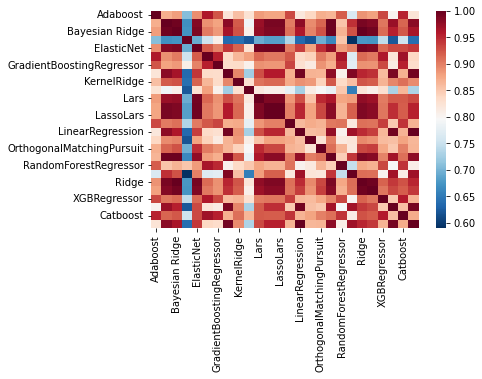

In [73]:
sns.heatmap(ixi_predicted_age_corr, annot=False, cmap='RdBu_r', vmin = ixi_predicted_age_corr.min().min(), vmax =  ixi_predicted_age_corr.max().max())

<AxesSubplot:>

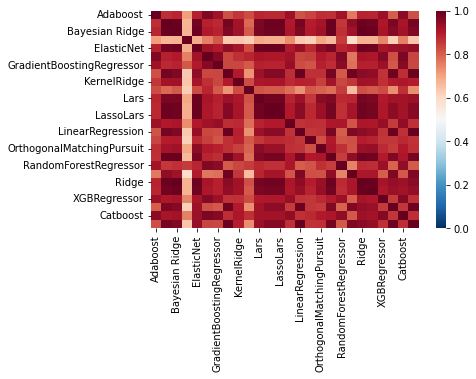

In [78]:
sns.heatmap(ixi_predicted_age_corr, annot=False, cmap='RdBu_r', vmin =0, vmax =1)

<AxesSubplot:>

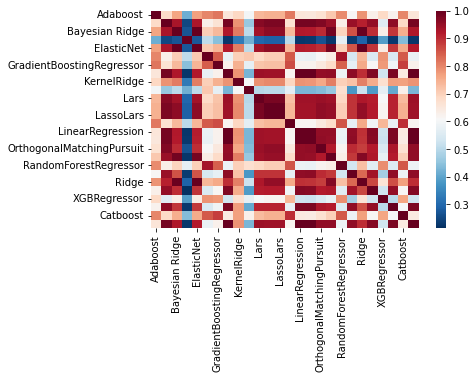

In [75]:
sns.heatmap(hcp_predicted_age_corr, annot=False, cmap='RdBu_r', vmin = hcp_predicted_age_corr.min().min(), vmax =  hcp_predicted_age_corr.max().max())

<AxesSubplot:>

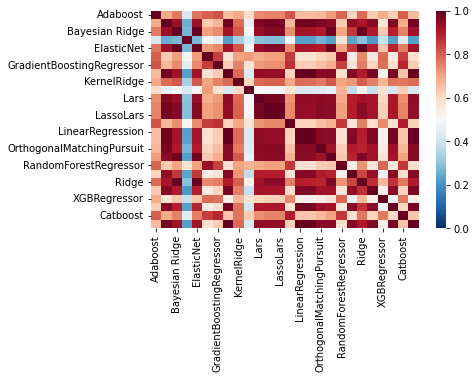

In [77]:
sns.heatmap(hcp_predicted_age_corr, annot=False, cmap='RdBu_r', vmin =0, vmax =1)

<AxesSubplot:>

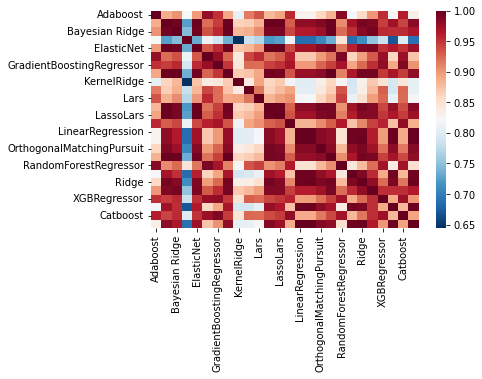

In [79]:
sns.heatmap(cc_predicted_age_corr, annot=False, cmap='RdBu_r', vmin = cc_predicted_age_corr.min().min(), vmax =  cc_predicted_age_corr.max().max())

<AxesSubplot:>

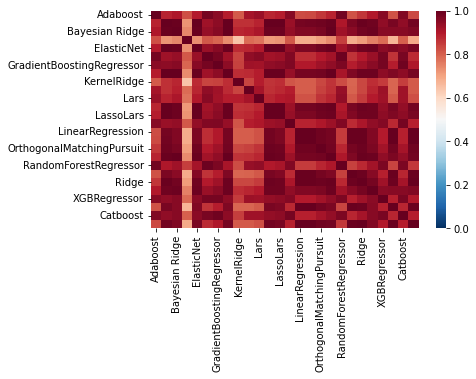

In [80]:
sns.heatmap(cc_predicted_age_corr, annot=False, cmap='RdBu_r', vmin =0, vmax =1)

### Feature Importance 

In [51]:
ixi_feat_imp = save_feature_importance('ixi')
hcp_feat_imp = save_feature_importance('hcp')
cc_feat_imp = save_feature_importance('cc')

IXI Start!
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pi

In [56]:
ixi_feat_imp.head()
# hcp_feat_imp.head()
cc_feat_imp.head()

,ARD,Bayesian Ridge,ElasticNet,HuberRegressor,Lars,Lasso,LassoLars,LinearRegression,OrthogonalMatchingPursuit,PassiveAggressiveRegressor,Ridge,SVR,TheilsenRegressor,Adaboost,Decision Tree,ExtraTreesRegressor,GradientBoostingRegressor,LGBMRegressor,RandomForestRegressor,XGBRegressor,Catboost,RANSAC,GaussianProcess,KernelRidge
0,8.312502,3.995002,6.933533,4.996230,0.000000,8.684229,8.281938,10.006853,8.951034,5.043075,7.700274,4.430280,10.439142,0.000000,0.0,0.001933,0.006027,29,0.001148,0.000875,1.537597,9.920435,10.006848,10.240675
1,-0.457567,-0.442006,-0.440665,-0.338545,-0.252223,-0.438275,-0.513318,-0.163941,-0.613794,-0.271749,-0.193986,-0.458041,-0.043767,0.005310,0.0,0.005685,0.017097,3,0.003528,0.000753,0.388200,0.050442,-0.163933,-0.291637
2,-1.614804,-1.533702,-1.797374,-1.754311,-1.041261,-1.908692,-1.791899,-2.360551,-1.931377,-1.941201,-2.158654,-1.975145,-2.824508,0.015460,0.0,0.012815,0.018648,16,0.010170,0.001942,1.396669,-2.815878,-2.360556,-2.326794
3,0.533700,0.529222,0.372150,0.587518,0.000000,0.411125,0.311791,0.782408,0.686136,0.639149,0.733013,0.557910,0.731863,0.000000,0.0,0.001340,0.001017,0,0.001125,0.000685,0.132361,0.688245,0.782410,1.032665
4,0.596125,0.613962,0.562056,0.719220,0.000000,0.666120,0.530379,0.991976,0.883218,0.830724,0.911602,0.673070,0.840516,0.000324,0.0,0.001322,0.001708,0,0.000794,0.000412,0.297269,1.001649,0.991983,0.906683


In [63]:
ixi_feat_imp_corr = ixi_feat_imp.corr()
hcp_feat_imp_corr = hcp_feat_imp.corr()
cc_feat_imp_corr = cc_feat_imp.corr()

In [64]:
print(f'ixi_feat_imp_corr.shape : {ixi_feat_imp_corr.shape}')
print(f'hcp_feat_imp_corr.shape : {hcp_feat_imp_corr.shape}')
print(f'cc_feat_imp_corr.shape : {cc_feat_imp_corr.shape}')

ixi_feat_imp_corr.shape : (24, 24)
hcp_feat_imp_corr.shape : (24, 24)
cc_feat_imp_corr.shape : (24, 24)


**Visualization**

<AxesSubplot:>

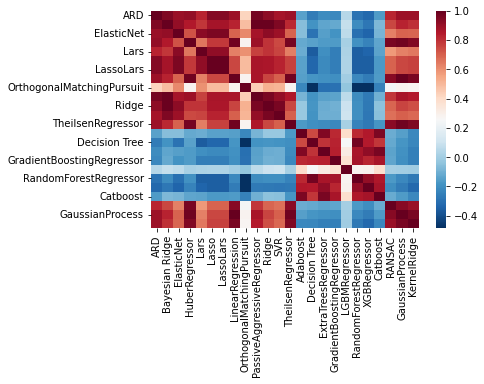

In [67]:
sns.heatmap(ixi_feat_imp_corr, annot=False, cmap='RdBu_r', vmin = ixi_feat_imp_corr.min().min(), vmax =  ixi_feat_imp_corr.max().max())

<AxesSubplot:>

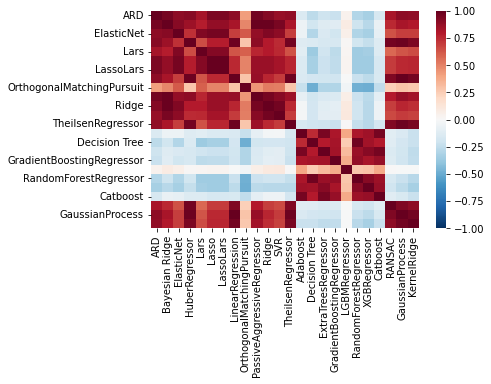

In [68]:
sns.heatmap(ixi_feat_imp_corr, annot=False, cmap='RdBu_r', vmin = -1, vmax = 1)

<AxesSubplot:>

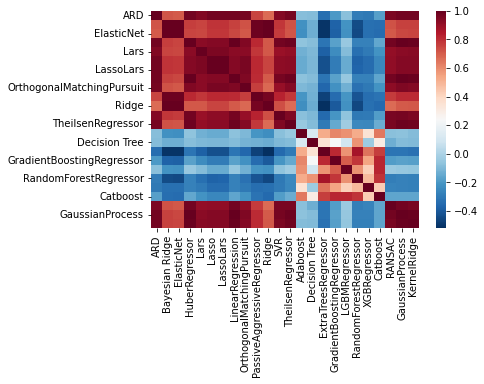

In [69]:
sns.heatmap(hcp_feat_imp_corr, annot=False, cmap='RdBu_r', vmin = hcp_feat_imp_corr.min().min(), vmax =  hcp_feat_imp_corr.max().max())

<AxesSubplot:>

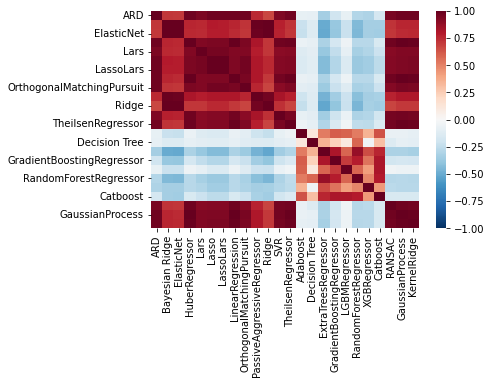

In [70]:
sns.heatmap(hcp_feat_imp_corr, annot=False, cmap='RdBu_r', vmin = -1, vmax = 1)

<AxesSubplot:>

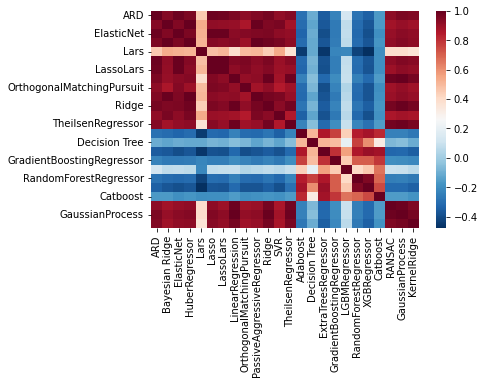

In [71]:
sns.heatmap(cc_feat_imp_corr, annot=False, cmap='RdBu_r', vmin = cc_feat_imp_corr.min().min(), vmax =  cc_feat_imp_corr.max().max())

<AxesSubplot:>

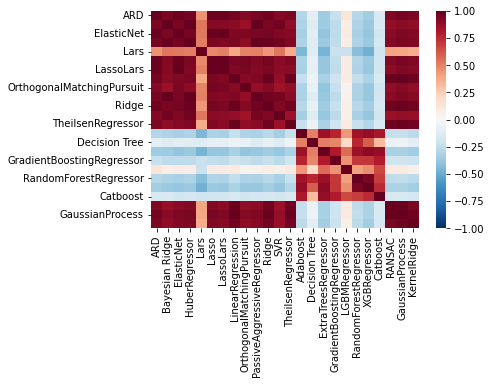

In [72]:
sns.heatmap(cc_feat_imp_corr, annot=False, cmap='RdBu_r', vmin =-1, vmax =1)